# 1. 필요 라이브러리 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 로드하기

In [46]:
df_stroke = pd.read_csv('/content/drive/MyDrive/data/stroke/train.csv')

In [5]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [6]:
df_stroke.shape

(15304, 12)

In [7]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


* 15304개의 데이터로 구성되어 있고 12개의 컬럼으로 이루어져 있다.
* 결측값은 없는 것으로 보여진다.
* 변수 설명
    * id : 회원 아이디 번호
    * gender : 성별 -> Female - 여성 / Male - 남성
    * age : 나이
    * hypertension : 고혈압
    * heart_disease : 심장 질환
    * ever_married : 결혼 유무
    * work_type : 작업 유형
    * Residence_type : 거주 유형
    * avg_glucose_level : 평균 포도당 수치
    * bmi : 체질량지수
    * smoking_status : 흡연 유무
    * stroke : 뇌졸중 유무 -> 0 : 뇌졸중 x / 1 : 뇌졸중 o


---
출처 : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


* 뇌졸중 : 뇌의 일부분에 혈액을 공급하는 혈관이 막히거나(뇌경색) 터짐(뇌출혈)으로써 그 부분의 뇌가 손상되어 나타나느 신경학적 증상을 말합니다. 
* 뇌졸중 주요 원인 
    1. 죽상동맥경화성 혈전증
    2. 색전증
    3. 고혈압성 뇌 내 출혈
    4. 동맥류
    5. 혈관 기형
    6. 동맥염
    7. 혈액 질환
    8. 모야모야병


---


출처 : https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=30518

* 위 변수들 중에서 **고혈압** 변수가 뇌졸중에 큰 영향을 줄 것으로 보인다. 

# 3. 변수 별 시각화하기

## 3.1 stroke (target)

In [8]:
df_stroke['stroke'].value_counts()

0    14672
1      632
Name: stroke, dtype: int64

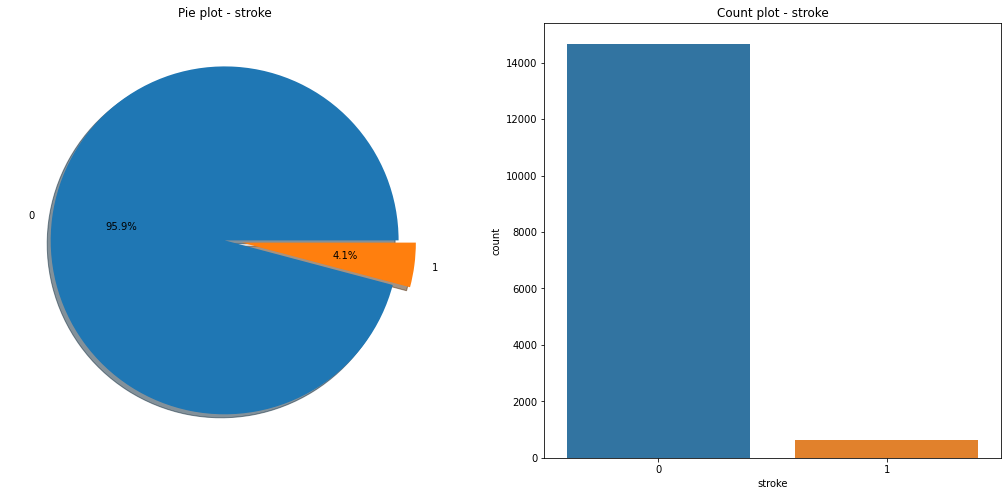

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18,8))


df_stroke['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - stroke')
ax[0].set_ylabel('')
sns.countplot('stroke', data=df_stroke, ax=ax[1])
ax[1].set_title('Count plot - stroke')

plt.show()

* 뇌졸중이 없는 환자가 15304명 뇌줄중이 있는 환자가 632명입니다.
* 전체 데이터 중 뇌졸중이 있는 환자의 비율은 4.1%입니다.
* 주어진 데이터에 뇌졸중이 있는 환자의 데이터가 많지 않다. 

## 3.2 gender

* 성별에 따라 뇌졸중에 분포는 크게 다르지 않을 것 같다.

In [10]:
df_stroke['gender'].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [24]:
# 성별이 남자인 데이터
df_male = df_stroke[df_stroke['gender'] == 'Male']
df_male

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
7,7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
10,10,Male,51.0,0,0,Yes,Self-employed,Urban,114.89,20.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,Male,53.0,0,0,Yes,Private,Rural,86.96,32.8,Unknown,0
15289,15289,Male,55.0,0,0,Yes,Govt_job,Urban,55.28,31.5,never smoked,0
15294,15294,Male,79.0,0,0,Yes,Private,Rural,60.98,24.7,Unknown,1
15295,15295,Male,12.0,0,0,No,children,Urban,69.78,14.3,never smoked,0


In [25]:
# 성별이 여자인 데이터
df_female = df_stroke[df_stroke['gender'] == 'Female']
df_female

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
6,6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
8,8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15298,15298,Female,17.0,0,0,No,Private,Rural,77.65,24.8,smokes,0
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [22]:
# 성별이 other인 데이터 확인
df_stroke[df_stroke['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9363,9363,Other,9.0,0,0,No,children,Rural,96.04,18.0,Unknown,0


* 성별을 알 수 없는 환자는 9살이고 **뇌졸중이 없는 환자**이다. 
* 성별이 other인 데이터를 어떻게 처리해줘야 할까?
    1. 뇌졸중이 없는 환자 데이터이므로 이미 많기 때문에 지워준다.
    2. 남성 데이터보다 여성 데이터가 많기 때문에 남성이라고 지정해준다.


In [26]:
df_male['stroke'].value_counts()

0    5593
1     264
Name: stroke, dtype: int64

In [27]:
df_female['stroke'].value_counts()

0    9078
1     368
Name: stroke, dtype: int64

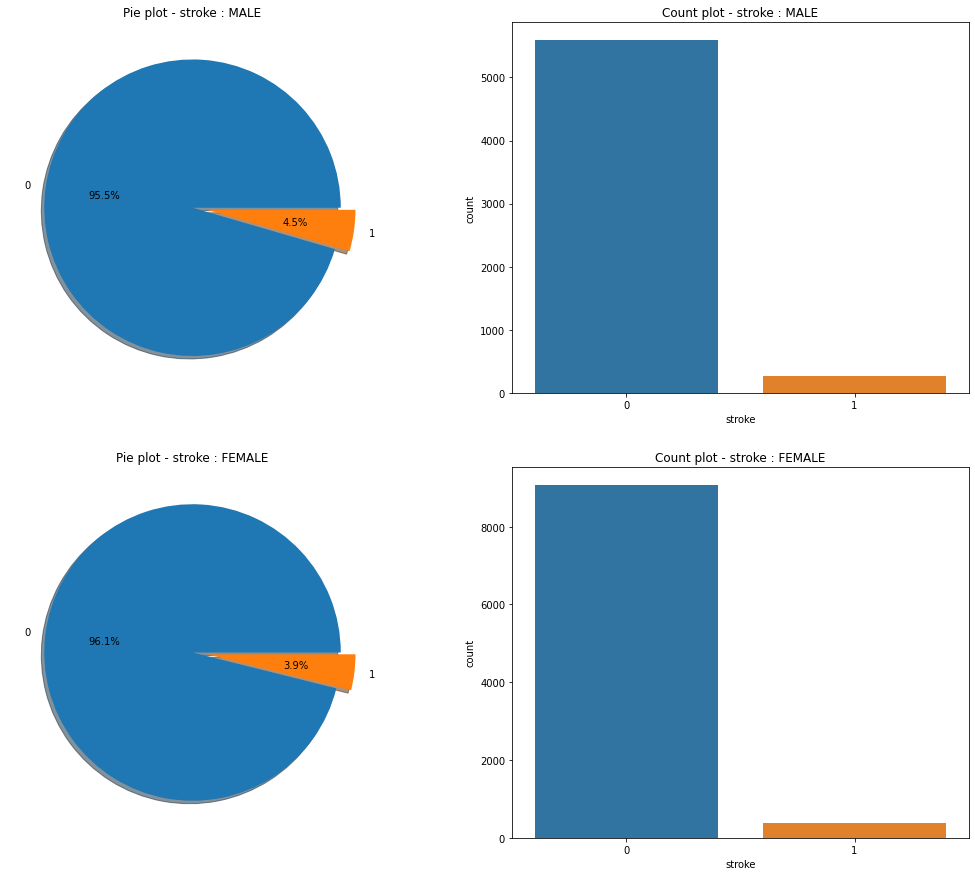

In [29]:
f, ax = plt.subplots(2, 2, figsize = (18,15))


df_male['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0, 0], shadow=True)
ax[0, 0].set_title('Pie plot - stroke : MALE')
ax[0, 0].set_ylabel('')
sns.countplot('stroke', data=df_male, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - stroke : MALE')

df_female['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - stroke : FEMALE')
ax[1, 0].set_ylabel('')
sns.countplot('stroke', data=df_female, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - stroke : FEMALE')

plt.show()
     

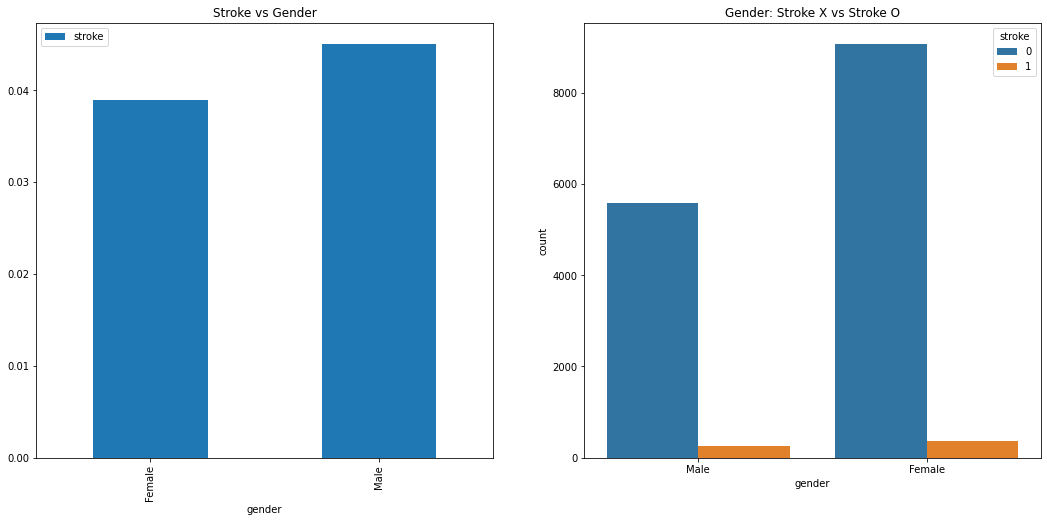

In [32]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 성별이 other인 데이터 제외
df_new = df_stroke[df_stroke['gender'] != 'Other']

df_new[['gender', 'stroke']].groupby(['gender'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Stroke vs Gender')
sns.countplot('gender', hue='stroke', data=df_new, ax=ax[1])
ax[1].set_title('Gender: Stroke X vs Stroke O')
plt.show()

In [39]:
df_new[['gender', 'stroke']].groupby(['gender'], as_index = False).mean().sort_values(by='stroke', ascending = False)

,gender,stroke
1,Male,0.045074
0,Female,0.038958


In [40]:
pd.crosstab(df_new['gender'], df_new['stroke'], margins=True).style.background_gradient(cmap = 'summer_r')

stroke,0,1,All
gender,,,
Female,9078,368,9446
Male,5593,264,5857
All,14671,632,15303


* 총 15304개 데이터
    * 남자 : 5857 -> 264명 뇌졸중 : 4.5%
    * 여자 : 9446 -> 368명 뇌졸중 : 3.9%
    * 알 수 없음 : 1 -> 뇌졸중 X
* **결론 : 성별로 나누기 전과 후의 분포가 크게 다르지 않다.**

## 3.3 age

* 나이가 많을수록 뇌졸중이 있을 확률이 높을 것 같다.

In [43]:
print('제일 나이 많은 환자 : {:.1f} 세'.format(df_stroke['age'].max()))
print('제일 나이 어린 환자 : {:.1f} 세'.format(df_stroke['age'].min()))
print('환자 평균 나이 : {:.1f} 세'.format(df_stroke['age'].mean()))

제일 나이 많은 환자 : 82.0 세
제일 나이 어린 환자 : 0.1 세
환자 평균 나이 : 41.4 세


In [55]:
# 0.1세 데이터 확인 -> 0.08세 확인
df_stroke[df_stroke['age'] == 0.08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3071,3071,Male,0.08,0,0,No,children,Rural,73.33,17.4,Unknown,0
3137,3137,Male,0.08,0,0,No,children,Urban,75.93,14.8,Unknown,0
4155,4155,Female,0.08,0,0,Yes,Private,Urban,79.33,33.2,Unknown,0
4738,4738,Male,0.08,0,0,No,children,Urban,72.01,19.5,Unknown,0
7278,7278,Male,0.08,0,0,No,children,Urban,86.32,16.6,Unknown,0
7579,7579,Male,0.08,0,0,No,children,Rural,80.08,18.1,Unknown,0


* 나이가 0.08세인 환자는 총6명이고 모두 **뇌졸중이 없는 환자**이다. 
* 나이가 0.08세인 데이터를 어떻게 처리해줘야 할까?
    1. 뇌졸중이 없는 환자 데이터이므로 이미 많기 때문에 지워준다.
    2. 0세로 바꿔 표기해줘야한다.
